In [1]:
import sys, os
import glob
import pickle
import pandas as pd
import numpy as np
from pathlib import Path

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

sys.path.append('../src/')
from count_datasets import CountDataset, CountGridDataset
from count_datasets import load_count_dataset, load_count_grid_dataset, read_annotated_starray
from training import train_spotwise, train_gridwise
from gridnet_models import GridNetHexOddr
from utils import all_fgd_predictions
from plotting import performance_curves

import matplotlib.pyplot as plt
%matplotlib inline

H_VISIUM = 78
W_VISIUM = 64

In [3]:
# Paths to count, image data
data_dir = '/Users/adaly/Desktop/BA44/'

meta = pd.read_csv(os.path.join(data_dir, 'Splotch_Metadata.tsv'), sep='\t', header=0)

count_files = np.array([os.path.join(data_dir, cfile) for cfile in meta['Count file']])
image_files = np.array([os.path.join(data_dir, ifile.replace('HE', 'HE_ccast')) for ifile in meta['Image file']])
annot_files = np.array([os.path.join(data_dir, 
                                     afile.replace('annotations', 'annotations_splotch_bin')).replace('csv', 'tsv') 
                        for afile in meta['Annotation file']])

count_files_pp = np.array([os.path.join(data_dir, 'countfiles_norm', Path(cf).name) for cf in count_files])

annot_names = pd.read_csv(annot_files[0], index_col=0, header=0, sep='\t').index
print(annot_names)

individuals = np.unique(meta['Level 3'])
partitions = [individuals[:3], individuals[3:6], individuals[6:9], individuals[9:]]

Index(['White_matter', 'Grey_matter'], dtype='object')


## Train a binary classifier (Grey vs. White matter) using principal components of count data

### Spot-wise training

Test Partition: BA44_SD004/16, BA44_SD008/13, BA44_SD011/18


/Users/adaly/Documents/Python/gridnext/notebooks/../src/count_datasets.py:34: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1634272478997/work/torch/csrc/utils/tensor_new.cpp:201.)
  count_data_full = torch.tensor(count_data_full).float()


Epoch 0/99
----------
train Loss: 0.1967 Acc: 0.9356
val Loss: 0.1608 Acc: 0.9412

Epoch 1/99
----------
train Loss: 0.1095 Acc: 0.9595
val Loss: 0.1549 Acc: 0.9429

Epoch 2/99
----------
train Loss: 0.0756 Acc: 0.9729
val Loss: 0.1796 Acc: 0.9369

Epoch 3/99
----------
train Loss: 0.0385 Acc: 0.9877
val Loss: 0.2505 Acc: 0.9240

Epoch 4/99
----------
train Loss: 0.0169 Acc: 0.9958
val Loss: 0.2909 Acc: 0.9219

Epoch 5/99
----------
train Loss: 0.0107 Acc: 0.9974
val Loss: 0.2946 Acc: 0.9253

Epoch 6/99
----------
train Loss: 0.0046 Acc: 0.9992
val Loss: 0.3344 Acc: 0.9198

Epoch 7/99
----------
train Loss: 0.0069 Acc: 0.9982
val Loss: 0.3758 Acc: 0.9218

Epoch 8/99
----------
train Loss: 0.0050 Acc: 0.9987
val Loss: 0.3880 Acc: 0.9254

Epoch 9/99
----------
train Loss: 0.0027 Acc: 0.9995
val Loss: 0.3829 Acc: 0.9264

Epoch 10/99
----------
train Loss: 0.0043 Acc: 0.9987
val Loss: 0.3794 Acc: 0.9310

Epoch 11/99
----------
train Loss: 0.0107 Acc: 0.9962
val Loss: 0.3793 Acc: 0.9284

Ep


Epoch 98/99
----------
train Loss: 0.0021 Acc: 0.9993
val Loss: 0.6203 Acc: 0.9235

Epoch 99/99
----------
train Loss: 0.0025 Acc: 0.9992
val Loss: 0.6292 Acc: 0.9198

Training complete in 31m 45s
Best val Acc: 0.942942


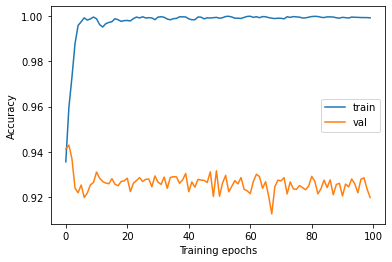

Test Partition: BA44_SD012/13, BA44_SD014/16, BA44_SD015/16
Epoch 0/99
----------
train Loss: 0.1524 Acc: 0.9475
val Loss: 0.6347 Acc: 0.7365

Epoch 1/99
----------
train Loss: 0.0985 Acc: 0.9636
val Loss: 0.6643 Acc: 0.7502

Epoch 2/99
----------
train Loss: 0.0655 Acc: 0.9765
val Loss: 0.7780 Acc: 0.7574

Epoch 3/99
----------
train Loss: 0.0287 Acc: 0.9915
val Loss: 0.9642 Acc: 0.7619

Epoch 4/99
----------
train Loss: 0.0141 Acc: 0.9961
val Loss: 0.8305 Acc: 0.7931

Epoch 5/99
----------
train Loss: 0.0098 Acc: 0.9972
val Loss: 1.1216 Acc: 0.7641

Epoch 6/99
----------
train Loss: 0.0087 Acc: 0.9973
val Loss: 1.1324 Acc: 0.7784

Epoch 7/99
----------
train Loss: 0.0077 Acc: 0.9975
val Loss: 1.1718 Acc: 0.7789

Epoch 8/99
----------
train Loss: 0.0069 Acc: 0.9977
val Loss: 1.0813 Acc: 0.8015

Epoch 9/99
----------
train Loss: 0.0069 Acc: 0.9976
val Loss: 1.1875 Acc: 0.7877

Epoch 10/99
----------
train Loss: 0.0063 Acc: 0.9978
val Loss: 1.4352 Acc: 0.7679

Epoch 11/99
----------
tra


Epoch 97/99
----------
train Loss: 0.0009 Acc: 0.9997
val Loss: 1.7921 Acc: 0.7968

Epoch 98/99
----------
train Loss: 0.0008 Acc: 0.9997
val Loss: 1.8503 Acc: 0.8001

Epoch 99/99
----------
train Loss: 0.0012 Acc: 0.9996
val Loss: 1.7555 Acc: 0.8061

Training complete in 32m 56s
Best val Acc: 0.816693


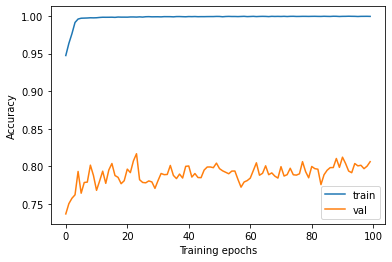

Test Partition: BA44_SD026/12, BA44_SD030/18, BA44_SD032/12
Epoch 0/99
----------
train Loss: 0.1928 Acc: 0.9346
val Loss: 0.1288 Acc: 0.9521

Epoch 1/99
----------
train Loss: 0.1144 Acc: 0.9572
val Loss: 0.1249 Acc: 0.9524

Epoch 2/99
----------
train Loss: 0.0808 Acc: 0.9700
val Loss: 0.1436 Acc: 0.9485

Epoch 3/99
----------
train Loss: 0.0400 Acc: 0.9867
val Loss: 0.1834 Acc: 0.9433

Epoch 4/99
----------
train Loss: 0.0187 Acc: 0.9947
val Loss: 0.2220 Acc: 0.9425

Epoch 5/99
----------
train Loss: 0.0125 Acc: 0.9962
val Loss: 0.2474 Acc: 0.9406

Epoch 6/99
----------
train Loss: 0.0116 Acc: 0.9962
val Loss: 0.2616 Acc: 0.9427

Epoch 7/99
----------
train Loss: 0.0097 Acc: 0.9967
val Loss: 0.2723 Acc: 0.9427

Epoch 8/99
----------
train Loss: 0.0086 Acc: 0.9971
val Loss: 0.3120 Acc: 0.9388

Epoch 9/99
----------
train Loss: 0.0073 Acc: 0.9976
val Loss: 0.2927 Acc: 0.9427

Epoch 10/99
----------
train Loss: 0.0080 Acc: 0.9973
val Loss: 0.3041 Acc: 0.9405

Epoch 11/99
----------
tra


Epoch 97/99
----------
train Loss: 0.0015 Acc: 0.9994
val Loss: 0.5118 Acc: 0.9430

Epoch 98/99
----------
train Loss: 0.0010 Acc: 0.9997
val Loss: 0.5156 Acc: 0.9422

Epoch 99/99
----------
train Loss: 0.0006 Acc: 0.9998
val Loss: 0.5335 Acc: 0.9413

Training complete in 35m 18s
Best val Acc: 0.952400


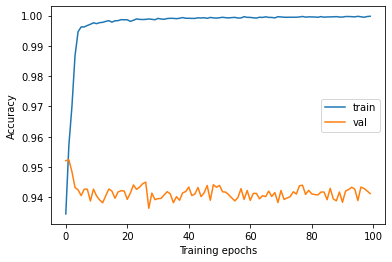

Test Partition: BA44_SD032/16, BA44_SD033/15, BA44_SD049/15
Epoch 0/99
----------
train Loss: 0.1712 Acc: 0.9396
val Loss: 0.1185 Acc: 0.9544

Epoch 1/99
----------
train Loss: 0.1112 Acc: 0.9580
val Loss: 0.1220 Acc: 0.9521

Epoch 2/99
----------
train Loss: 0.0707 Acc: 0.9751
val Loss: 0.1429 Acc: 0.9475

Epoch 3/99
----------
train Loss: 0.0317 Acc: 0.9898
val Loss: 0.1773 Acc: 0.9446

Epoch 4/99
----------
train Loss: 0.0157 Acc: 0.9953
val Loss: 0.2052 Acc: 0.9464

Epoch 5/99
----------
train Loss: 0.0124 Acc: 0.9958
val Loss: 0.2383 Acc: 0.9429

Epoch 6/99
----------
train Loss: 0.0105 Acc: 0.9966
val Loss: 0.2574 Acc: 0.9436

Epoch 7/99
----------
train Loss: 0.0098 Acc: 0.9967
val Loss: 0.2489 Acc: 0.9459

Epoch 8/99
----------
train Loss: 0.0084 Acc: 0.9973
val Loss: 0.2676 Acc: 0.9420

Epoch 9/99
----------
train Loss: 0.0076 Acc: 0.9974
val Loss: 0.2751 Acc: 0.9454

Epoch 10/99
----------
train Loss: 0.0073 Acc: 0.9976
val Loss: 0.2954 Acc: 0.9433

Epoch 11/99
----------
tra


Epoch 97/99
----------
train Loss: 0.0013 Acc: 0.9996
val Loss: 0.4484 Acc: 0.9460

Epoch 98/99
----------
train Loss: 0.0009 Acc: 0.9996
val Loss: 0.4986 Acc: 0.9450

Epoch 99/99
----------
train Loss: 0.0016 Acc: 0.9994
val Loss: 0.4534 Acc: 0.9454

Training complete in 37m 36s
Best val Acc: 0.954396


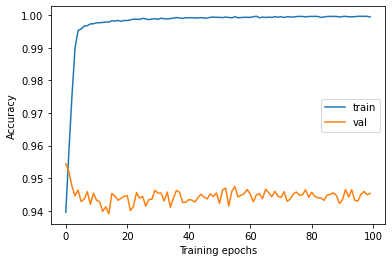

In [5]:
count_files_pca = np.array([cf.replace('.unified.tsv', '.pca.tsv') for cf in count_files_pp])

df = pd.read_csv(count_files_pca[0], header=0, index_col=0, sep='\t')
npcs = len(df.index)

train_hist_part, val_hist_part = [],[]

for i, p in enumerate(partitions):
    print('Test Partition: %s' % ', '.join(p))
    val_inds = np.array([indiv in p for indiv in meta['Level 3']])
    train_inds = np.logical_not(val_inds)
    
    val_set = load_count_dataset(count_files_pca[val_inds], annot_files[val_inds])
    train_set = load_count_dataset(count_files_pca[train_inds], annot_files[train_inds])
    
    dataloader_spots = {
        'train': DataLoader(train_set, batch_size=128, shuffle=True),
        'val': DataLoader(val_set, batch_size=128)
    }
    
    spot_clf_pcs = nn.Sequential(
        nn.Linear(npcs, 500),
        nn.Linear(500, 100),
        nn.BatchNorm1d(100),
        nn.ReLU(),

        nn.Linear(100, 100),
        nn.Linear(100, 50),
        nn.BatchNorm1d(50),
        nn.ReLU(),

        nn.Linear(50, len(annot_names))
    )

    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(spot_clf_pcs.parameters(), lr=1e-4)

    spot_clf_pcs, val_hist, train_hist = train_spotwise(spot_clf_pcs, dataloader_spots, loss, optimizer, 
                                                        100, display=False,
                                          outfile='../models/spot_binclassifier_pcs_ba44_p%d.pth' % i)
    train_hist_part.append(train_hist)
    val_hist_part.append(val_hist)

    fig = plt.figure()
    plt.plot(train_hist, label='train')
    plt.plot(val_hist, label='val')
    plt.xlabel('Training epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Grid-wise training

Test Partition: BA44_SD004/16, BA44_SD008/13, BA44_SD011/18
Epoch 0/99
----------
train Loss: 3.2863 Acc: 0.9297
val Loss: 0.8995 Acc: 0.9481

Epoch 1/99
----------
train Loss: 0.2867 Acc: 0.9746
val Loss: 0.6216 Acc: 0.9470

Epoch 2/99
----------
train Loss: 0.1672 Acc: 0.9759
val Loss: 0.5353 Acc: 0.9419

Epoch 3/99
----------
train Loss: 0.1408 Acc: 0.9757
val Loss: 0.4619 Acc: 0.9392

Epoch 4/99
----------
train Loss: 0.1266 Acc: 0.9760
val Loss: 0.5527 Acc: 0.9397

Epoch 5/99
----------
train Loss: 0.1066 Acc: 0.9778
val Loss: 0.4935 Acc: 0.9428

Epoch 6/99
----------
train Loss: 0.0997 Acc: 0.9780
val Loss: 0.3929 Acc: 0.9450

Epoch 7/99
----------
train Loss: 0.0924 Acc: 0.9780
val Loss: 0.2891 Acc: 0.9493

Epoch 8/99
----------
train Loss: 0.0834 Acc: 0.9803
val Loss: 0.3062 Acc: 0.9444

Epoch 9/99
----------
train Loss: 0.0782 Acc: 0.9791
val Loss: 0.2803 Acc: 0.9495

Epoch 10/99
----------
train Loss: 0.0767 Acc: 0.9791
val Loss: 0.3381 Acc: 0.9457

Epoch 11/99
----------
tra


Epoch 97/99
----------
train Loss: 0.0271 Acc: 0.9896
val Loss: 0.2317 Acc: 0.9498

Epoch 98/99
----------
train Loss: 0.0248 Acc: 0.9903
val Loss: 0.2573 Acc: 0.9467

Epoch 99/99
----------
train Loss: 0.0272 Acc: 0.9896
val Loss: 0.2015 Acc: 0.9495

Training complete in 10m 59s
Best val Acc: 0.955569


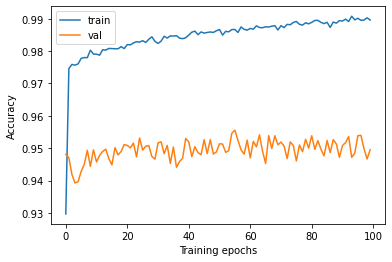

Test Partition: BA44_SD012/13, BA44_SD014/16, BA44_SD015/16
Epoch 0/99
----------
train Loss: 3.0837 Acc: 0.9614
val Loss: 15.5561 Acc: 0.8299

Epoch 1/99
----------
train Loss: 0.0503 Acc: 0.9986
val Loss: 15.7856 Acc: 0.8243

Epoch 2/99
----------
train Loss: 0.0209 Acc: 0.9992
val Loss: 14.9313 Acc: 0.8288

Epoch 3/99
----------
train Loss: 0.0116 Acc: 0.9995
val Loss: 14.8022 Acc: 0.8278

Epoch 4/99
----------
train Loss: 0.0097 Acc: 0.9996
val Loss: 14.9121 Acc: 0.8249

Epoch 5/99
----------
train Loss: 0.0058 Acc: 0.9997
val Loss: 15.0663 Acc: 0.8228

Epoch 6/99
----------
train Loss: 0.0045 Acc: 0.9997
val Loss: 15.0757 Acc: 0.8230

Epoch 7/99
----------
train Loss: 0.0036 Acc: 0.9997
val Loss: 15.2143 Acc: 0.8209

Epoch 8/99
----------
train Loss: 0.0030 Acc: 0.9997
val Loss: 15.2700 Acc: 0.8232

Epoch 9/99
----------
train Loss: 0.0018 Acc: 0.9998
val Loss: 14.8981 Acc: 0.8263

Epoch 10/99
----------
train Loss: 0.0013 Acc: 0.9998
val Loss: 15.4694 Acc: 0.8206

Epoch 11/99
---


Epoch 96/99
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 15.5047 Acc: 0.8219

Epoch 97/99
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 15.5054 Acc: 0.8219

Epoch 98/99
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 15.5069 Acc: 0.8219

Epoch 99/99
----------
train Loss: 0.0000 Acc: 1.0000
val Loss: 15.5074 Acc: 0.8219

Training complete in 13m 34s
Best val Acc: 0.829863


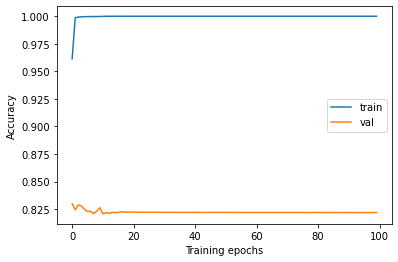

Test Partition: BA44_SD026/12, BA44_SD030/18, BA44_SD032/12
Epoch 0/99
----------
train Loss: 0.5594 Acc: 0.9698
val Loss: 0.6785 Acc: 0.9566

Epoch 1/99
----------
train Loss: 0.2115 Acc: 0.9733
val Loss: 0.4040 Acc: 0.9514

Epoch 2/99
----------
train Loss: 0.1544 Acc: 0.9726
val Loss: 0.3116 Acc: 0.9581

Epoch 3/99
----------
train Loss: 0.1166 Acc: 0.9750
val Loss: 0.2638 Acc: 0.9561

Epoch 4/99
----------
train Loss: 0.0933 Acc: 0.9757
val Loss: 0.2405 Acc: 0.9553

Epoch 5/99
----------
train Loss: 0.0929 Acc: 0.9769
val Loss: 0.1928 Acc: 0.9573

Epoch 6/99
----------
train Loss: 0.0776 Acc: 0.9766
val Loss: 0.1838 Acc: 0.9586

Epoch 7/99
----------
train Loss: 0.0702 Acc: 0.9781
val Loss: 0.1698 Acc: 0.9571

Epoch 8/99
----------
train Loss: 0.0659 Acc: 0.9778
val Loss: 0.1562 Acc: 0.9597

Epoch 9/99
----------
train Loss: 0.0649 Acc: 0.9788
val Loss: 0.1781 Acc: 0.9580

Epoch 10/99
----------
train Loss: 0.0583 Acc: 0.9795
val Loss: 0.1489 Acc: 0.9578

Epoch 11/99
----------
tra


Epoch 97/99
----------
train Loss: 0.0167 Acc: 0.9937
val Loss: 0.1792 Acc: 0.9608

Epoch 98/99
----------
train Loss: 0.0161 Acc: 0.9940
val Loss: 0.1870 Acc: 0.9592

Epoch 99/99
----------
train Loss: 0.0183 Acc: 0.9931
val Loss: 0.1807 Acc: 0.9617

Training complete in 11m 22s
Best val Acc: 0.962860


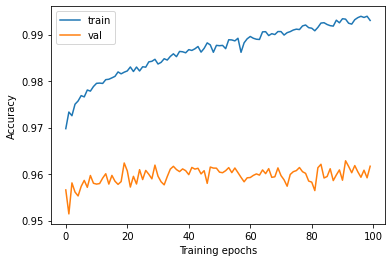

Test Partition: BA44_SD032/16, BA44_SD033/15, BA44_SD049/15
Epoch 0/99
----------
train Loss: 1.2301 Acc: 0.9498
val Loss: 0.5763 Acc: 0.9497

Epoch 1/99
----------
train Loss: 0.3045 Acc: 0.9602
val Loss: 0.3344 Acc: 0.9534

Epoch 2/99
----------
train Loss: 0.1823 Acc: 0.9620
val Loss: 0.1952 Acc: 0.9513

Epoch 3/99
----------
train Loss: 0.1514 Acc: 0.9610
val Loss: 0.1852 Acc: 0.9535

Epoch 4/99
----------
train Loss: 0.1218 Acc: 0.9636
val Loss: 0.1544 Acc: 0.9552

Epoch 5/99
----------
train Loss: 0.1066 Acc: 0.9635
val Loss: 0.1293 Acc: 0.9580

Epoch 6/99
----------
train Loss: 0.1031 Acc: 0.9640
val Loss: 0.1145 Acc: 0.9564

Epoch 7/99
----------
train Loss: 0.0966 Acc: 0.9642
val Loss: 0.1295 Acc: 0.9584

Epoch 8/99
----------
train Loss: 0.0866 Acc: 0.9655
val Loss: 0.1124 Acc: 0.9601

Epoch 9/99
----------
train Loss: 0.0811 Acc: 0.9669
val Loss: 0.1152 Acc: 0.9598

Epoch 10/99
----------
train Loss: 0.0831 Acc: 0.9659
val Loss: 0.0983 Acc: 0.9612

Epoch 11/99
----------
tra


Epoch 97/99
----------
train Loss: 0.0536 Acc: 0.9790
val Loss: 0.1211 Acc: 0.9617

Epoch 98/99
----------
train Loss: 0.0517 Acc: 0.9793
val Loss: 0.1141 Acc: 0.9597

Epoch 99/99
----------
train Loss: 0.0522 Acc: 0.9798
val Loss: 0.1305 Acc: 0.9611

Training complete in 11m 24s
Best val Acc: 0.964580


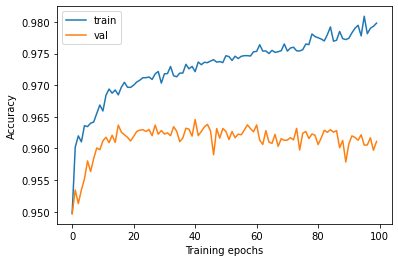

In [7]:
spot_clf_pcs = nn.Sequential(
    nn.Linear(npcs, 500),
    nn.Linear(500, 100),
    nn.BatchNorm1d(100),
    nn.ReLU(),

    nn.Linear(100, 100),
    nn.Linear(100, 50),
    nn.BatchNorm1d(50),
    nn.ReLU(),

    nn.Linear(50, len(annot_names))
)

train_hist_part, val_hist_part = [],[]
count_files_pca = np.array([cf.replace('.unified.tsv', '.pca.tsv') for cf in count_files_pp])

for i, p in enumerate(partitions):
    print('Test Partition: %s' % ', '.join(p))
    val_inds = np.array([indiv in p for indiv in meta['Level 3']])
    train_inds = np.logical_not(val_inds)
    
    train_grid_pca = load_count_grid_dataset(count_files_pca[train_inds], annot_files[train_inds])
    val_grid_pca = load_count_grid_dataset(count_files_pca[val_inds], annot_files[val_inds])
    
    dataloader_grid_pca = {
        'train': DataLoader(train_grid_pca, batch_size=1, shuffle=True),
        'val': DataLoader(val_grid_pca, batch_size=1, shuffle=False)
    }
    
    # Instantiate GridNetHex, then load pre-trained spot classifier by name
    gnet_pca = GridNetHexOddr(spot_clf_pcs, (npcs,), (H_VISIUM, W_VISIUM), n_classes=len(annot_names),
                 use_bn=False)
    classifier_pfile = '../models/spot_binclassifier_pcs_ba44_p%d.pth' % i
    gnet_pca.patch_classifier.load_state_dict(torch.load(classifier_pfile))

    # Fixing the parameters of the patch classifier allows slightly faster training, even when only
    #   optimizing the parameters of the corrector. 
    for param in gnet_pca.patch_classifier.parameters():
        param.requires_grad = False

    loss = nn.CrossEntropyLoss()

    # Only optimize the parameters in the g-network
    optimizer = torch.optim.Adam(gnet_pca.corrector.parameters(), lr=1e-3)

    gnet_pca, val_hist, train_hist = train_gridwise(gnet_pca, dataloader_grid_pca, loss, optimizer, num_epochs=100,
                                      outfile='../models/bingnet_pca_p%d.pth' % i)
    train_hist_part.append(train_hist)
    val_hist_part.append(val_hist)

    fig = plt.figure()
    plt.plot(train_hist, label='train')
    plt.plot(val_hist, label='val')
    plt.xlabel('Training epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Extract features from binary classifier and perform clustering. Then see what happens when we plot clusters back on tissue